# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [2]:
customer = pd.read_csv('segmentation data.csv')
customer

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
# Check apakah data ada yang terduplikat atau tidak
customer.duplicated().values.any()

False

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Metode .info() pada DataFrame untuk memahami tipe data di setiap kolom. Saya melihat tidak ada nilai yang hilang dan semua kolom memiliki nilai numerik di dalamnya.

In [5]:
# Mengecek unique value yang terdapat pada setiap kolom
for col in customer.columns:
    print(col)
    print(customer[col].unique())

ID
[100000001 100000002 100000003 ... 100001998 100001999 100002000]
Sex
[0 1]
Marital status
[0 1]
Age
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]
Education
[2 1 0 3]
Income
[124670 150773  89210 ...  86400  97968  68416]
Occupation
[1 0 2]
Settlement size
[2 0 1]


In [6]:
customer.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


2 metode diatas dapat menampilkan info ringkasan tentang statistik reguler yang mungkin di terapkan pada data kategorikal/numerik

In [7]:
numerical_columns = ['ID', 'Age', 'Income']
categorical_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# Mengubah tipe data kolom categorical menjadi tipe data string
customer[categorical_columns] = customer[categorical_columns].astype('str')

In [8]:
customer.describe(include='object').T

,count,unique,top,freq
Sex,2000,2,0,1086
Marital status,2000,2,0,1007
Education,2000,4,1,1386
Occupation,2000,3,1,1113
Settlement size,2000,3,0,989


In [9]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


# EDA (Eksplorasi Data Analysis)

## Univariate Analysis

### Check Persebaran Variabel Numerik

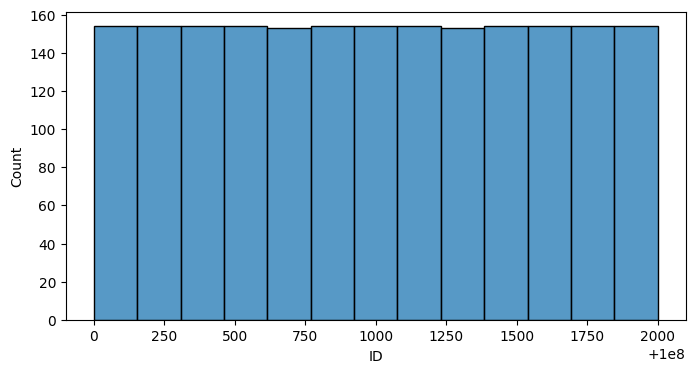

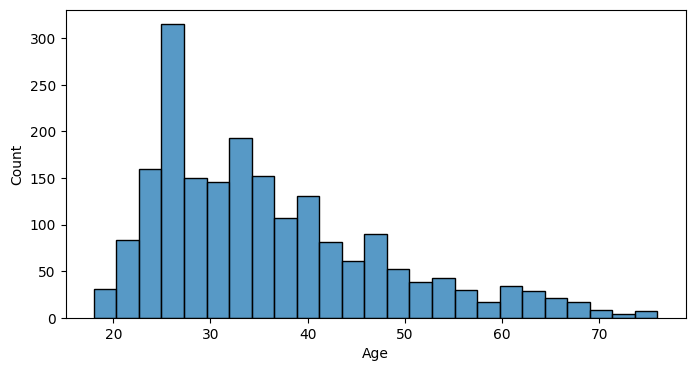

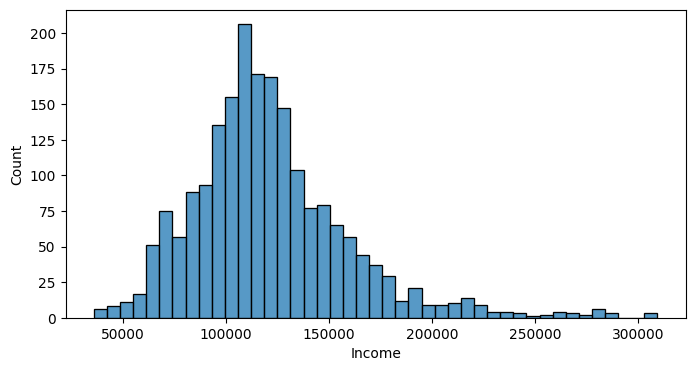

In [11]:
for numerical in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=customer, x=numerical)
    plt.savefig(numerical + '.png')

- Dapat dilihat bahwa ID memiliki distribusi yang seragam, masuk akal karena merupakan pengidentifikasian customer.
- Variabel Age memiliki skewed ke kanan.
- Variabel Income juga memiliki skewed ke kanan sama seperti variabel Age.


### Check Persebaran Variabel Kategorik

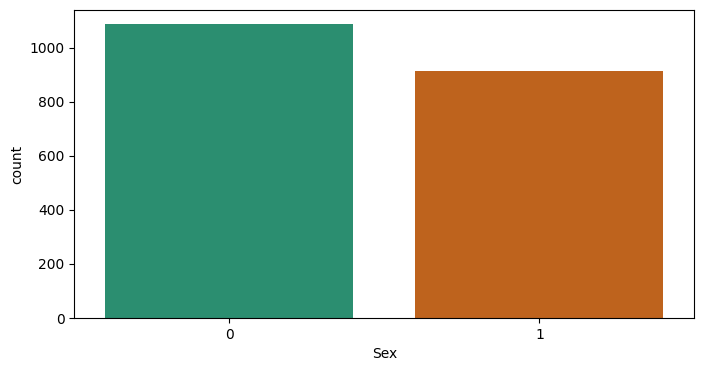

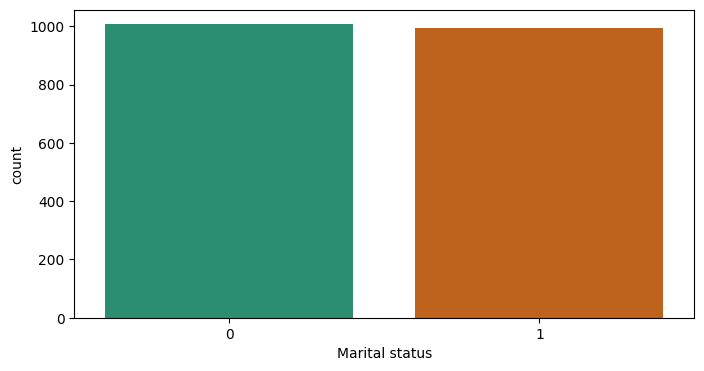

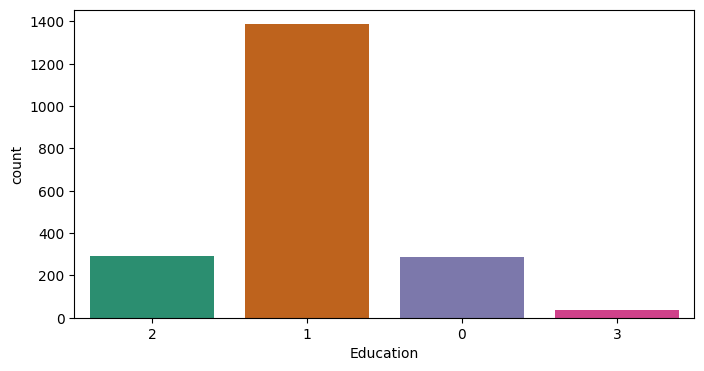

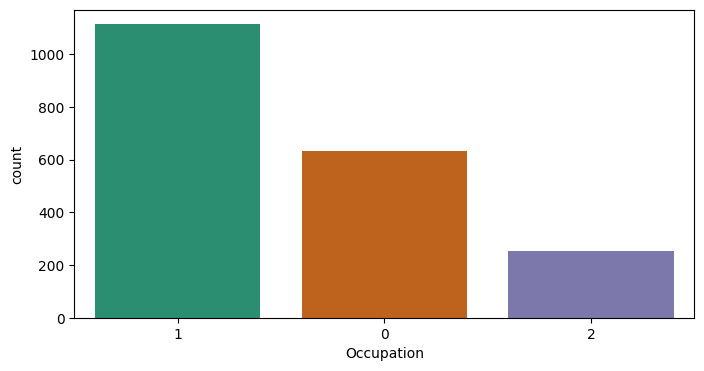

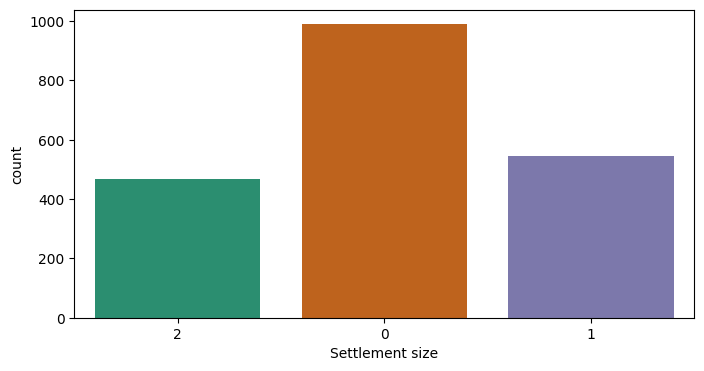

In [12]:
color_palette = sns.color_palette(palette='Dark2')

# Set palet warna
sns.set_palette(color_palette)

for category in categorical_columns:
  plt.figure(figsize=(8,4))
  sns.countplot(data=customer, x=category)

- Jenis Kelamin (Sex) dari customer jumlahnya cukup seimbang
- Status Perkawinan (Marital Status) juga seimbang
- Sebagian besar customer berpendidikan highschool hanya graduate students jumlahnya 1.8%. Kategori 2,3 bisa digabungkan menjadi university & over
- Fitur occupation dan settlement size nampaknya memiliki jumlah perbedaan kemunculan yang tinggi di setiap kategorinya

## Bivariate Analysis

### Age vs Income

<Axes: xlabel='Age', ylabel='Income'>

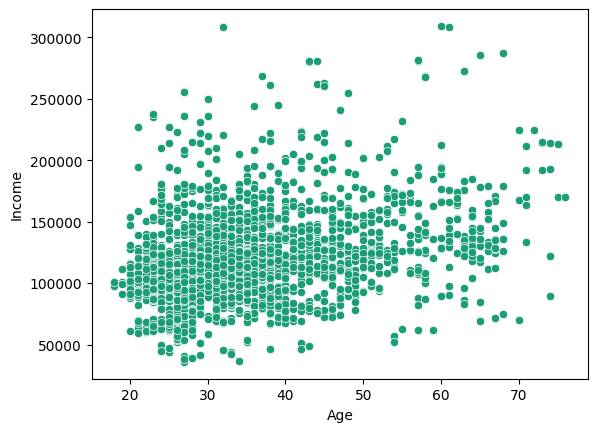

In [13]:
sns.scatterplot(x='Age', y='Income', data=customer)

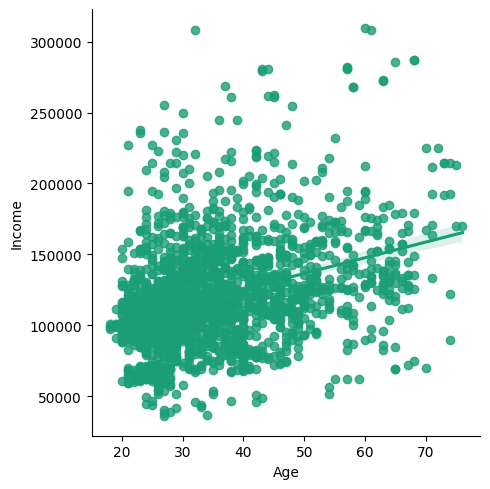

In [14]:
sns.lmplot(x='Age', y='Income', data=customer)

Ada beberapa korelasi kecil antara Age dan Income. Dilihat bahwa kemiringan garis yang sangat kecil, yang menunjukan bahwa korelasi antar fitur rendah. Dapat dilihat dibawah ini merupakan perhitungan faktor korelasi pearson yang menyatakan bahwa nilai - nilai memiliki korelasi kecil diantara kedua fitur tersebut

In [15]:
import scipy.stats as stats
print(stats.pearsonr(customer['Age'], customer['Income']))

PearsonRResult(statistic=0.34061016373173514, pvalue=1.6443825442386822e-55)


Note :
koefisien korelasi Pearson antara kedua variabel, yang mengindikasikan sejauh mana hubungan linier antara kedua variabel tersebut. Koefisien korelasi memiliki rentang nilai antara -1 hingga 1. Nilai positif menunjukkan hubungan linier positif, sedangkan nilai negatif menunjukkan hubungan linier negatif. Semakin dekat nilai dengan 1 atau -1, semakin kuat hubungan liniernya. Nilai kedua dalam tuple adalah nilai p-value yang merupakan ukuran signifikansi statistik dari korelasi tersebut. P-value menunjukkan seberapa kuat bukti yang ada untuk mendukung atau menolak hipotesis nol bahwa tidak ada korelasi antara kedua variabel.

### Numerical vs Categorical

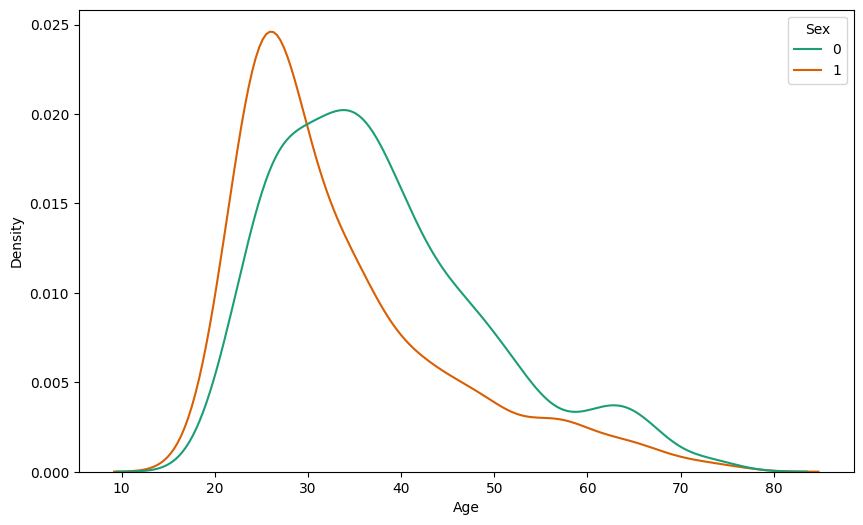

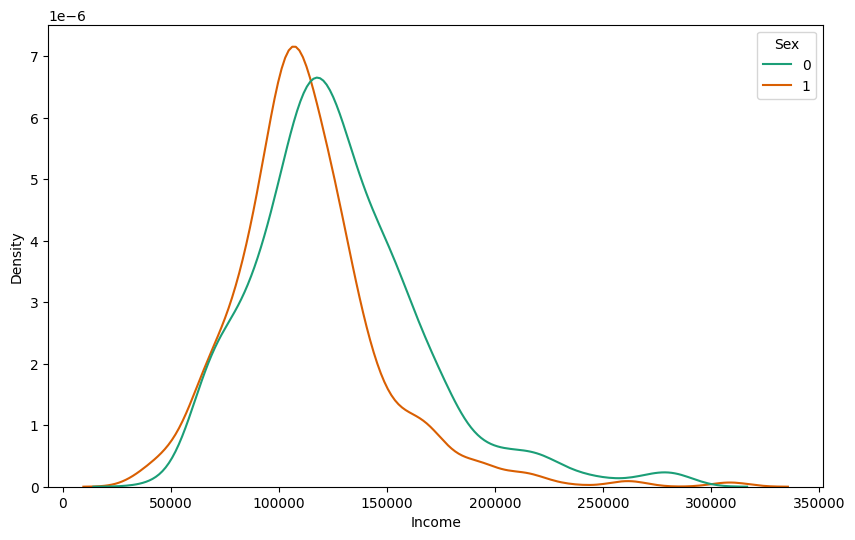

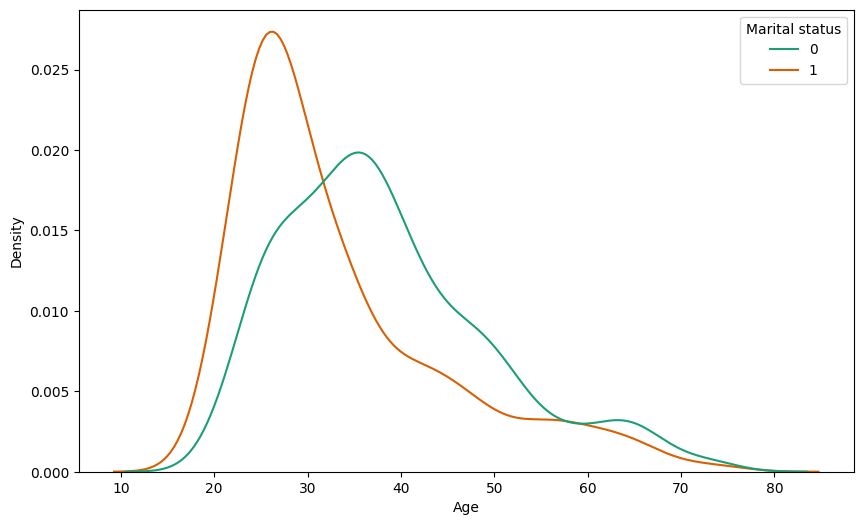

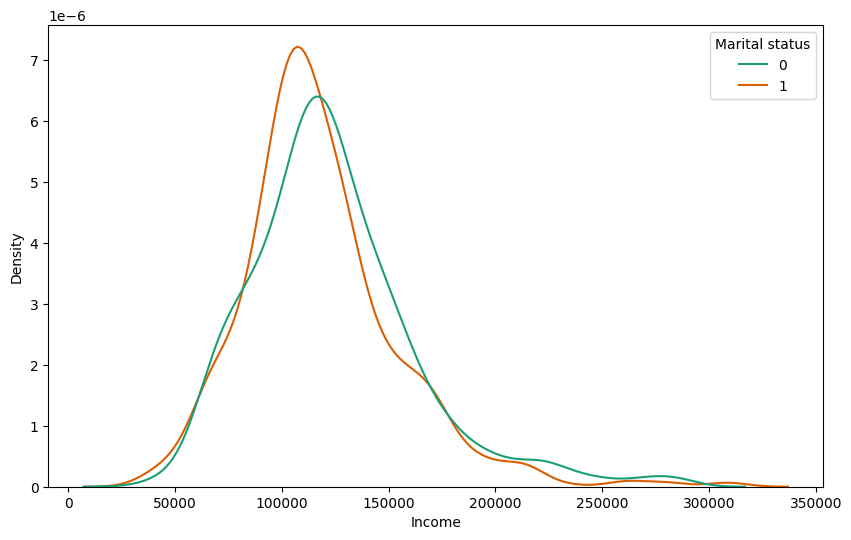

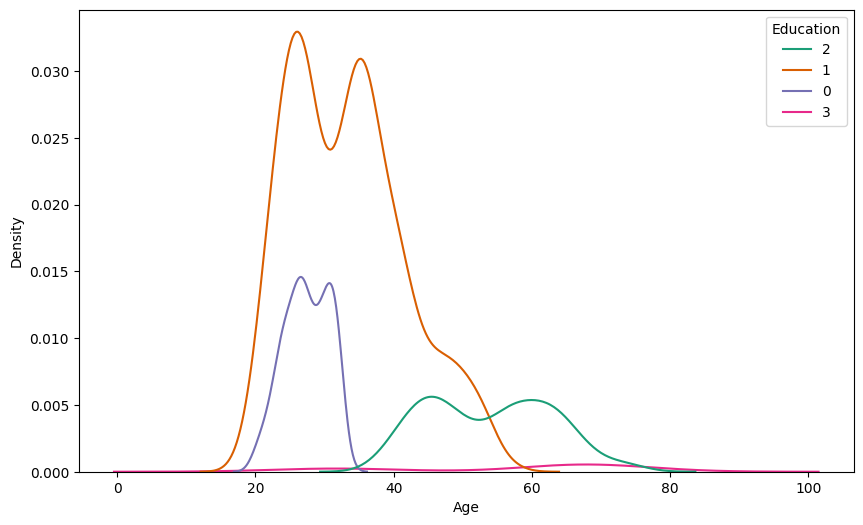

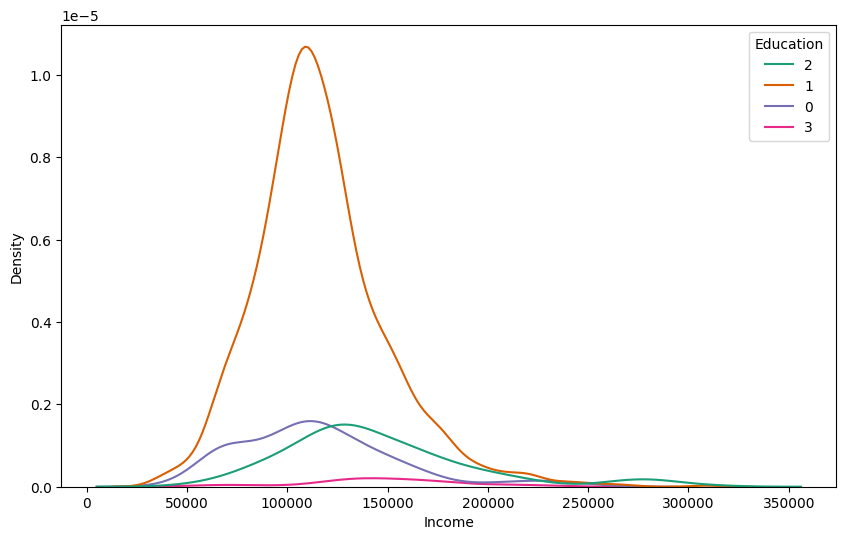

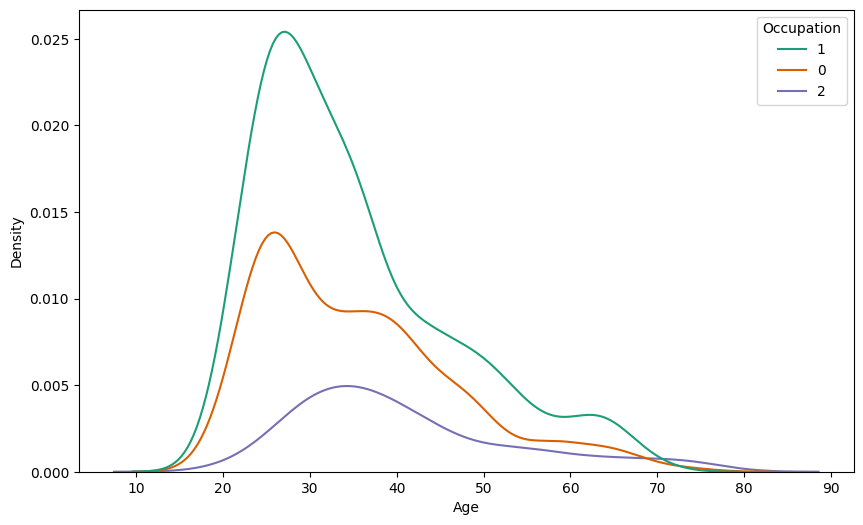

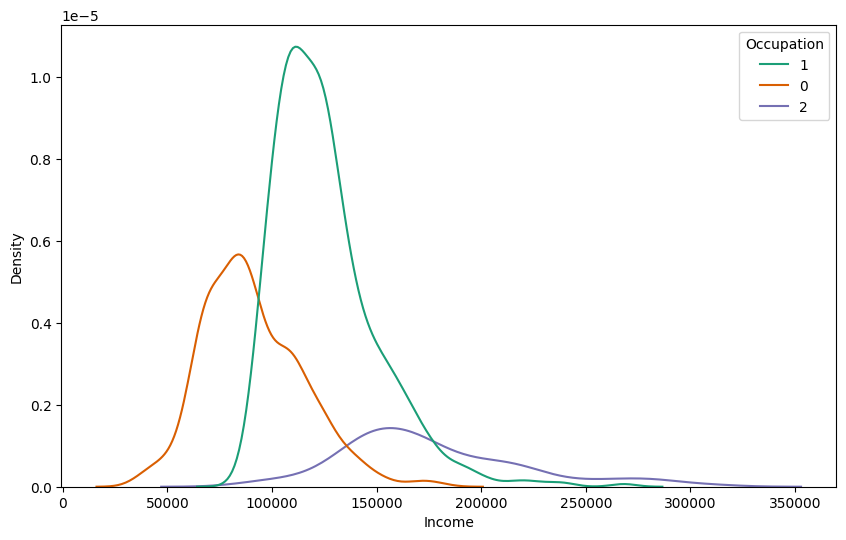

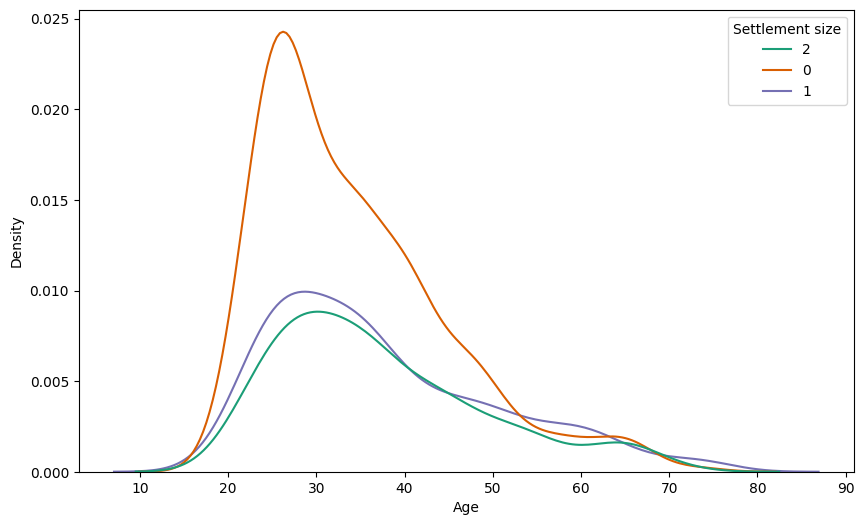

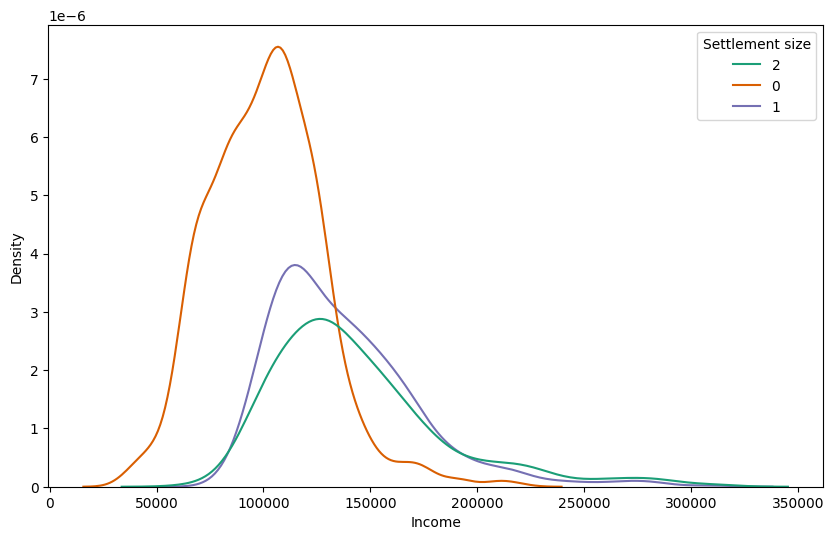

In [16]:
for categorical in categorical_columns:
  for numerical in numerical_columns:
    if numerical != 'ID':
      plt.figure(figsize=(10,6))
      sns.kdeplot(data = customer, x=numerical, hue=categorical)

### Categorical vs Categorical

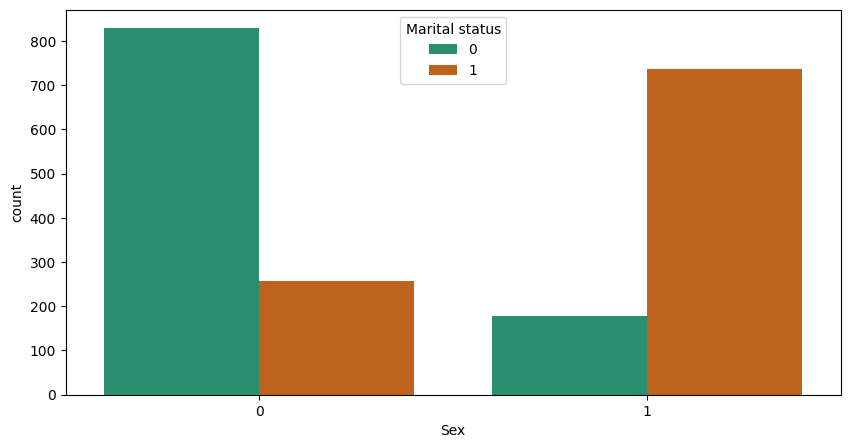

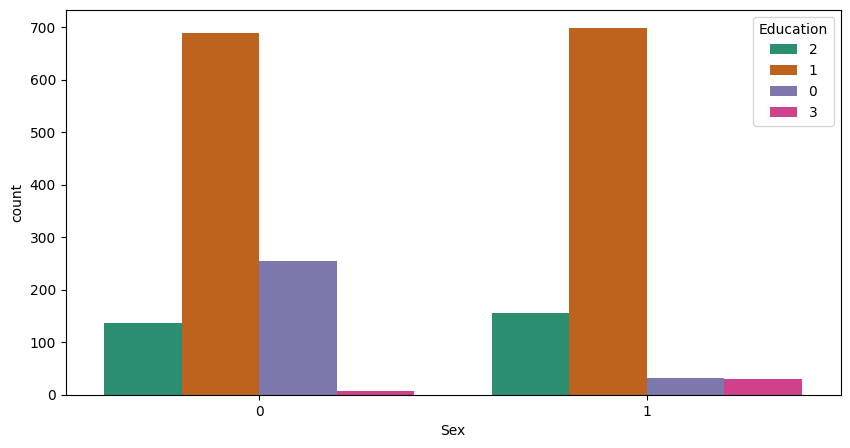

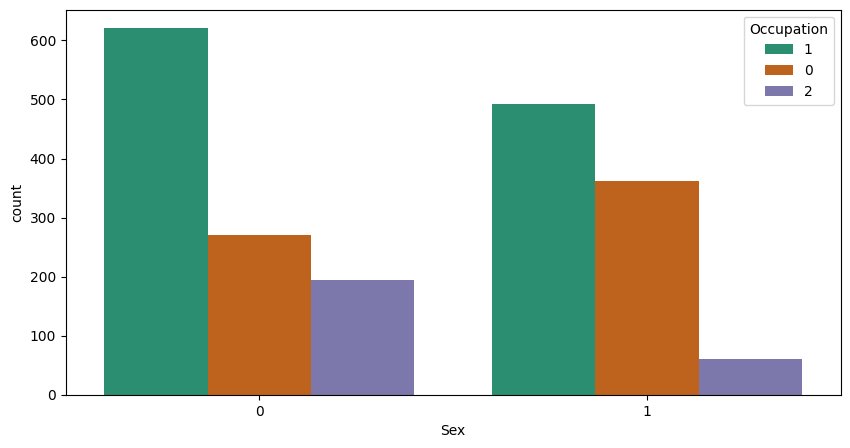

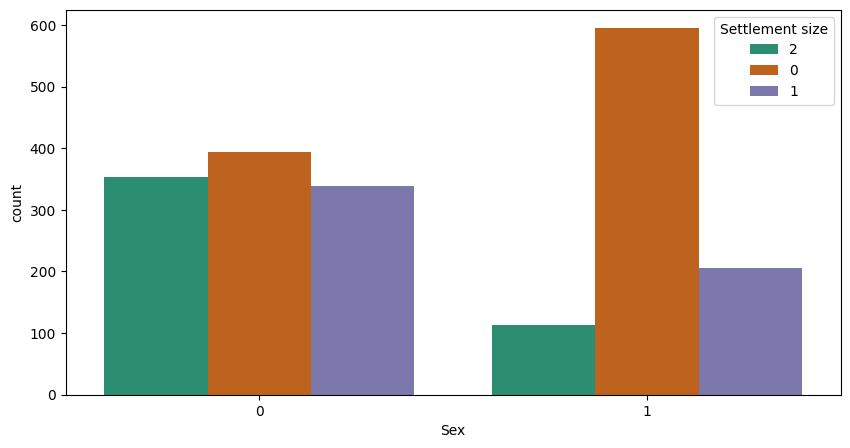

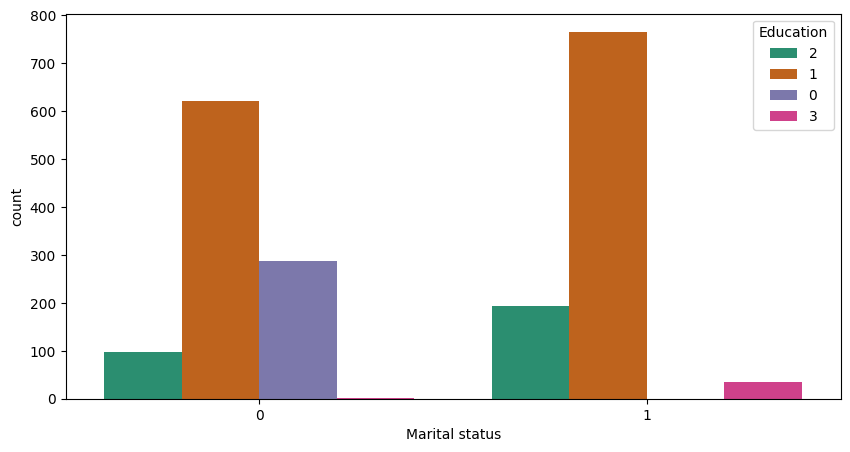

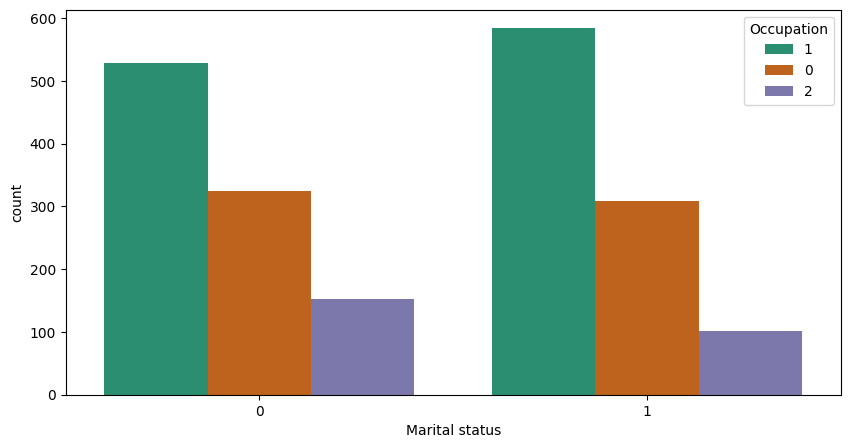

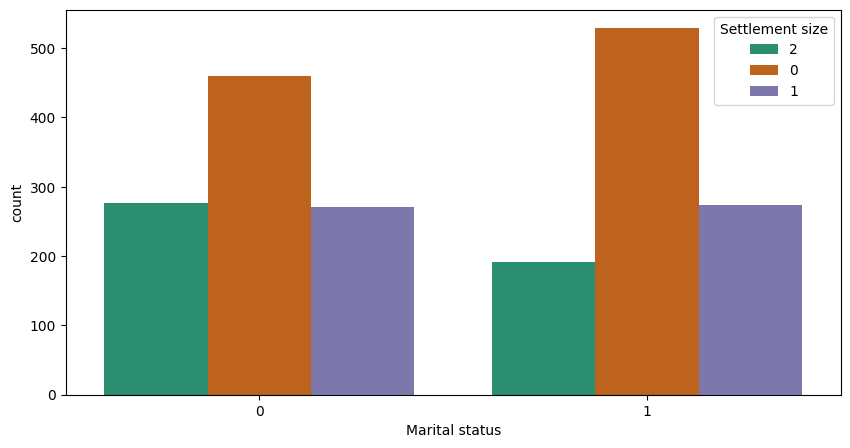

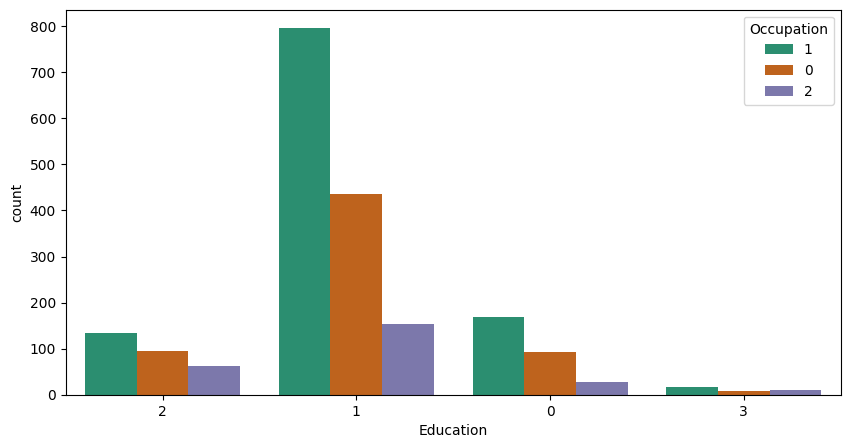

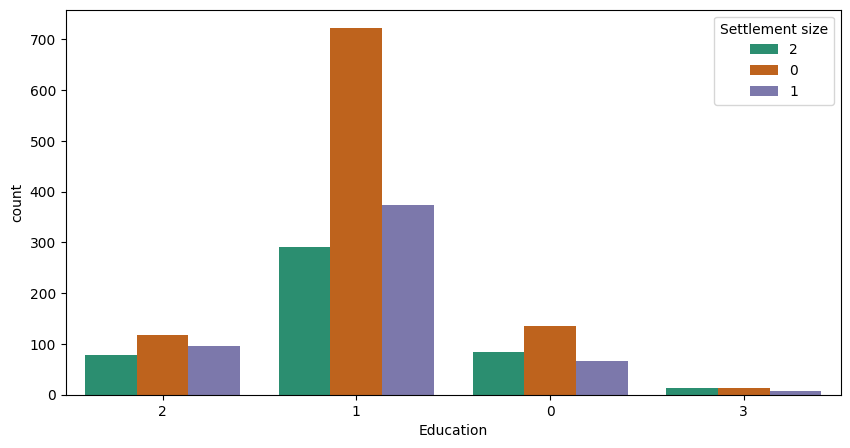

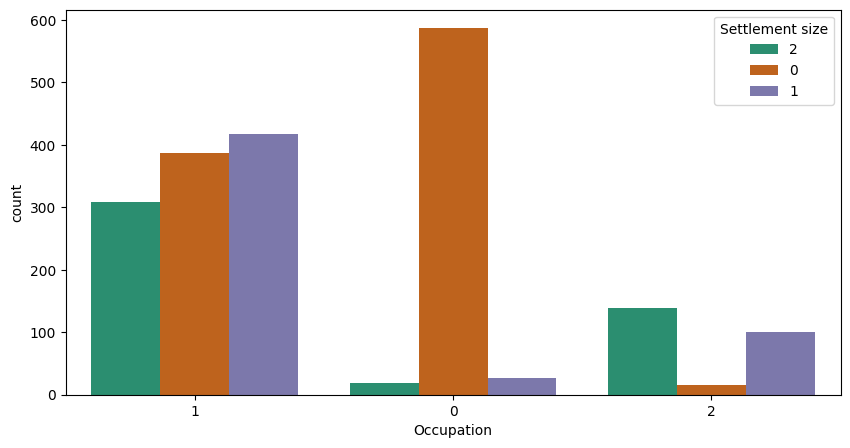

In [17]:
cat_aux = categorical_columns.copy()
for categorical1 in categorical_columns:
  cat_aux.pop(0)
  for categorical2 in cat_aux:
    plt.figure(figsize=(10,5))
    sns.countplot(data = customer, x=categorical1, hue=categorical2)

Ada beberapa hubungan yang dapat disimpulkan dari data diatas :
- Customer dengan pekerjaan(occupation) = '0' yang berarti unemployed cenderung lebih tinggal di kota kecil(settlement_size) = '0'
- Customer yang menikah(marital status) = '1' mempunyai pendidikan diantara HighSchool sampai dengan Graduate School (Education) = '1-3'
- Customer yang menikah(marital status) = '1' lebih banyak tinggal di kota kecil(settlement size) = '0'
- Customer Male (sex) = '0' lebih banyak bekerja daripada Female (sex) = '1' lebih tinggi tingkat angka unemployed (occupation) = '0'

## Multivariate Analysis

In [18]:
def multivariate_scatter(x, y, hue, df):
  plt.figure(figsize=(8,8))
  sns.scatterplot(x = x, y = y, data = df, hue = hue, alpha = 0.85)

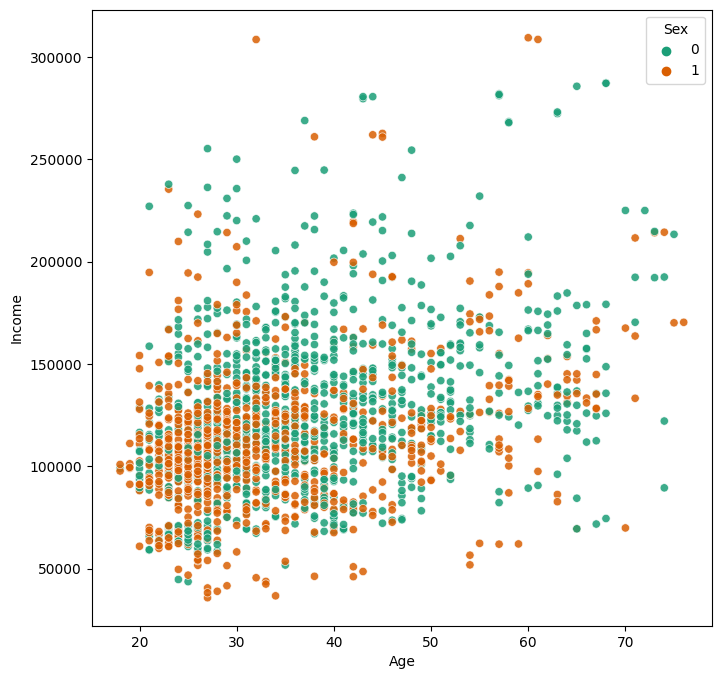

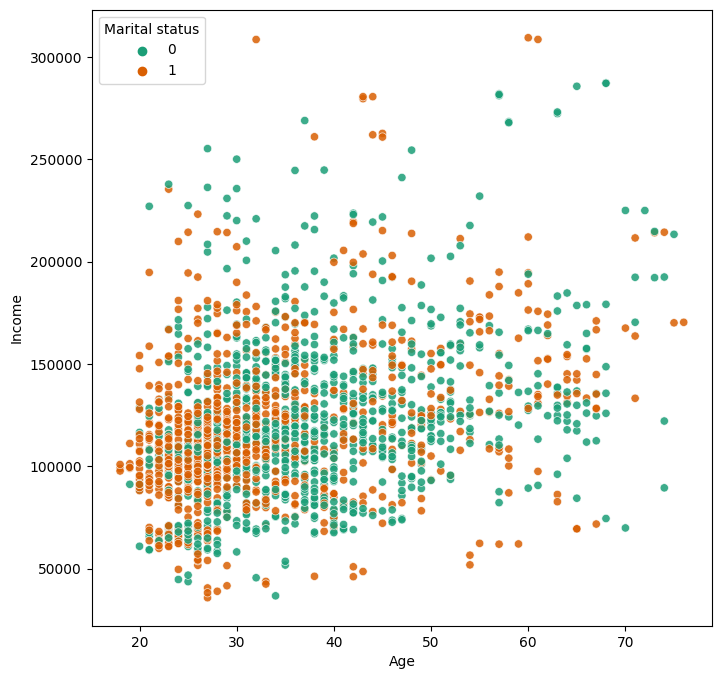

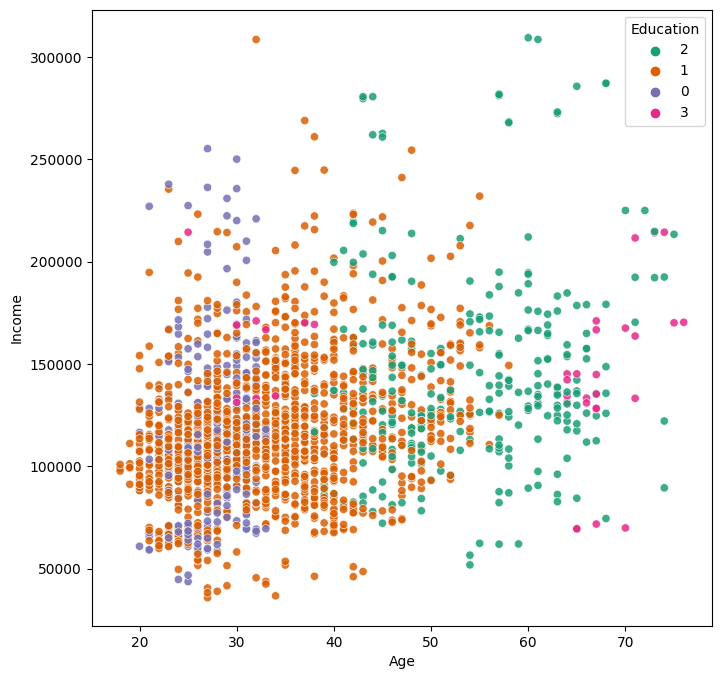

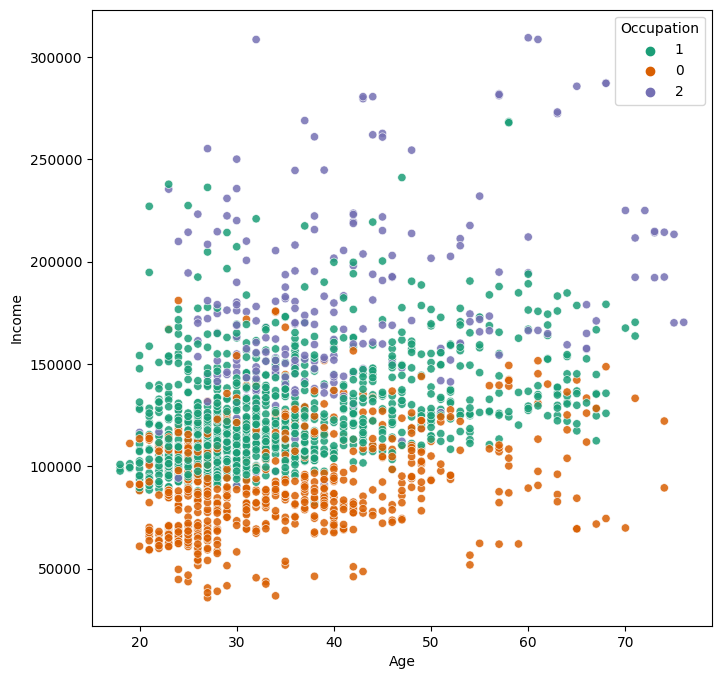

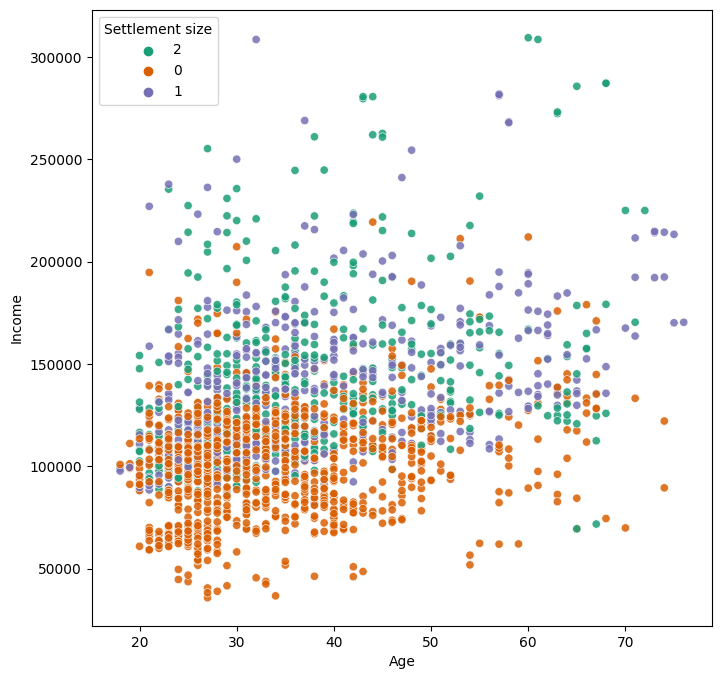

In [19]:
for categorical in categorical_columns:
  multivariate_scatter('Age', 'Income', categorical, customer)

Ada beberapa hubungan yang dapat dijadikan kesimpulan :
- Customer yang memiliki Income yang rendah cenderung tinggal di Kota Kecil (settlement_size) = 0
- Customer yang mempunyai pekerjaan (occupation) management/self-employed/high qualified employee/officer = '2' pendapatannya lebih tinggi daripada customer yang memiliki pekerjaan = '1', dan memiliki pendapatan yang lebih tinggi daripada customer yang unemployed = '0'
- Customer yang memiliki pendidikan(education) yang tinggi = '2' cenderung memiliki umur (Age) yang sudah tua, dan pendidikan yang tinggi tidak terlalu berpengaruh pada pendapatan (Income)
- Customer yang sudah menikah (marital status) = '1' memiliki pendapatan (Income) yang lebih rendah dan lebih muda (Age) daripada rata - rata customer yang lajang (marital status) = '0'
- Customer Male (Sex) = '0' memiliki pendapatan yang lebih tinggi daripada Female (Sex) = '1' ketika usianya (Age) sudah tua

# Kesimpulan EDA

Meskipun tidak ada missing values, saya sendiri melihat beberapa tren data yang nantinya bisa dibuatkan model yang sesuai dengan harapan :
- Fitur numerical category (Age, Income) memiliki distribusi skewed ke kanan. Ini harus diperbaiki agar model dapat bekerja secara baik dan benar, dan kemungkinan menggunakan transformasi log untuk memperbaiki distribusi data numerical category agar lebih simetris 
- Dari data tersebut terdapat korelasi kecil antara data Age dan Income, seperti yang diharapkan. Customer di kota kecil (settlement size) = '0' memiliki pendapatan (Income) yang rendah. Pendapatan (Income) yang lebih tinggi karena customer mempunyai pendidikan (Education) yang tinggi = '2'. Customer yang sudah menikah (marital status) = '1' cenderung memiliki pendapatan (Income) yang rendah daripada orang yang belum menikah (marital status) = '0', dan customer yang sudah menikah (marital status) = '1' usianya (age) cenderung lebih muda daripada yang belum menikah (marital status) = 0. Ketika customer tersebut memiliki usia (age) yang sudah tua jenis kelamin laki - laki (sex) = '0' memiliki pendapatan yang tinggi daripada yang perempuan (sex) = '1'. Sebagian besar orang yang unemployed (occupation) = '0' dan menikah (marital status) = '1' tinggal di kota kecil (settlement size) = '0'. Yang terakhir ada banyak perempuan (sex) = '1' yang menganggur daripada laki laki (sex) = '0'. 

# Feature Transforming dan Scaling

Numerical category menunjukan bahwa data skewed ke kanan. Saya akan mengecek apakah data tersebut berdistribusi normal atau tidak dengan menggunakan uji normalitas dari scipy. Memang dari visualisasi sudah dapat dilihat bahwa data skewed ke kanan, tetapi saya menjalankan pengujian ini untuk mendapatkan hasil yang tepat

## Uji Normalitas

In [20]:
from scipy import stats

normalitytest_result_income = stats.normaltest(customer['Income'])[1]
normalitytest_result_age = stats.normaltest(customer['Age'])[1]

print(f'Nilai-p untuk hipotesis nol dari Income yang terdistribusi secara normal adalah', normalitytest_result_income)
print(f'Nilai-p untuk hipotesis nol dari Age yang terdistribusi secara normal adalah', normalitytest_result_age)

Nilai-p untuk hipotesis nol dari Income yang terdistribusi secara normal adalah 2.5009638879187734e-98
Nilai-p untuk hipotesis nol dari Age yang terdistribusi secara normal adalah 3.3428344869999675e-56


H0 : Distribusi Normal
H1 : Distribusi Tidak Normal

Perhatikan bahwa nilai-p ini diberikan dalam notasi ilmiah atau notasi eksponensial. Notasi e-98 dan e-56 menunjukkan bahwa nilai tersebut merupakan notasi 10 pangkat minus 98 dan minus 56. Karena p-value sangat kecil, keputusan yang diambil adalah tolak H0 atau distribusi tidak normal. Nantinya saya akan menggunakan model **Clustering K-Means** yang mengasumsikan bahwa data terdistribusi dengan normal,untuk mengubah data menjadi normal, digunakan log tranformation dan power transformation

## Feature Transforming

Transformation cycle dibawah ini akan mengulang siklus berulang kali hingga mencapai distribusi yang cukup masuk akal. Untuk itu perlu membuat fungsi yang menerapkan transformasi pada data dengan menyesuaikan parameternya, lalu mengubah setiap nilai ke dalam distribusi yang baru. Dibawah ini akan diujikan dengan log dan powertransform, karena data memiliki skewed ke kanan yang kuat, terutama pada fitur Income

In [21]:
def apply_log(column):
  return np.log(column)

def normality_test(column):
  return stats.nomraltest(column)

### LogTransform & PowerTransformer

#### Feature Income

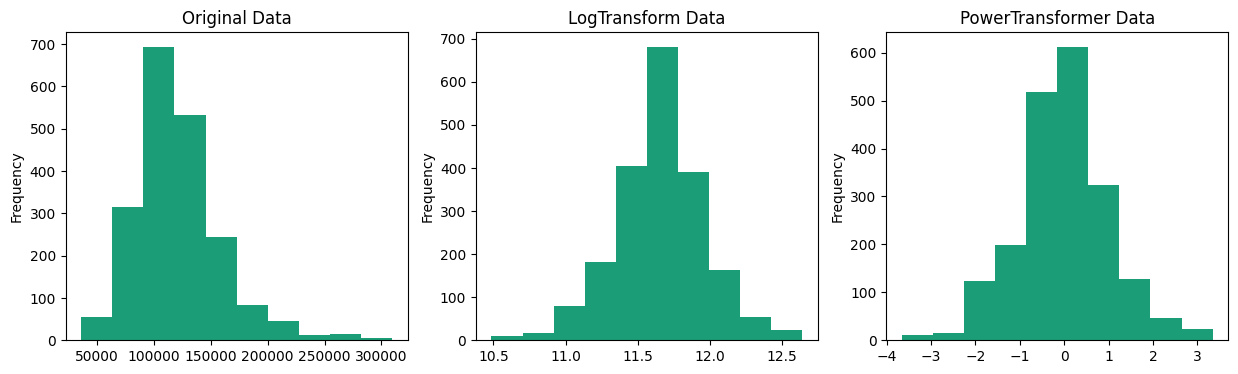

In [22]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import normaltest

# PowerTransformer Data
feature = customer['Income'].to_numpy().reshape(-1, 1)
power_transform = PowerTransformer()
feature_transform = power_transform.fit_transform(feature)
array1D = feature_transform.flatten()
feature = pd.Series(data=array1D, index=list(range(len(array1D))))

# LogTransform Data
log_transform_income = apply_log(customer['Income'])

# Membuat axis untuk original data plot(ax1), logtransform data (ax2), powertransformer data (ax3)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Membuat plot untuk original data
customer['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original Data')
norm_test1 = normaltest(customer['Income'])

# Membuat plot untuk logtransform data
log_transform_income.plot(kind='hist', ax=ax2)
ax2.title.set_text('LogTransform Data')
norm_test2 = normaltest(log_transform_income)

# Membuat plot untuk powertransformer data
feature.plot(kind='hist', ax=ax3)
ax3.title.set_text('PowerTransformer Data')
norm_test3 = normaltest(feature)

# Membuat DataFrame untuk melihat hasil normality test dari setiap transformation
norm_result = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_result, index=['Original Data', 'LogTransform Data', 'PowerTransformer Data']) 

In [23]:
metrics

,statistic,pvalue
Original Data,449.473326,2.500964e-98
LogTransform Data,32.357037,9.413664e-08
PowerTransformer Data,27.859212,8.921730e-07


#### Feature Age

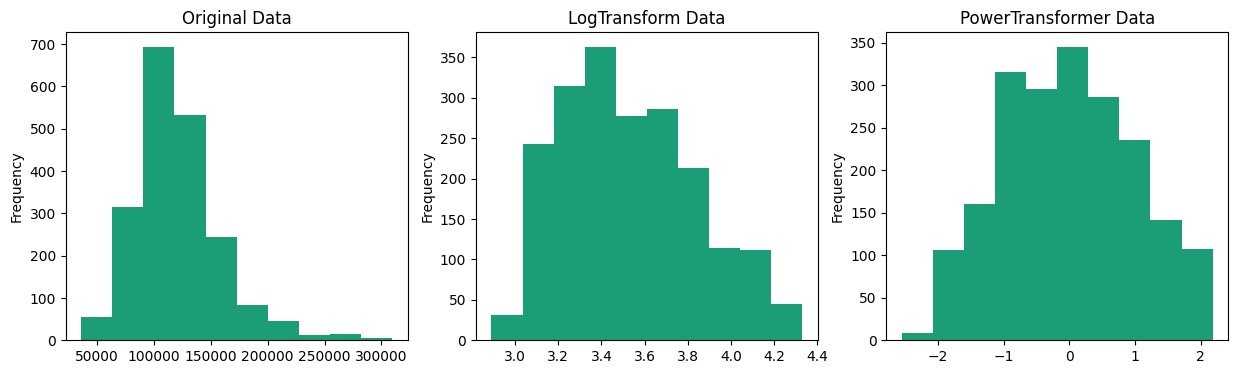

In [24]:
# PowerTransformer Data
feature1 = customer['Age'].to_numpy().reshape(-1, 1)
power_transform = PowerTransformer()
feature_transform = power_transform.fit_transform(feature1)
array1D = feature_transform.flatten()
feature1 = pd.Series(data=array1D, index=list(range(len(array1D))))

# LogTransform Data
log_transform_age = apply_log(customer['Age'])

# Membuat axis untuk original data plot(ax1), logtransform data (ax2), powertransformer data (ax3)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Membuat plot untuk original data
customer['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original Data')
norm_test1 = normaltest(customer['Income'])

# Membuat plot untuk logtransform data
log_transform_age.plot(kind='hist', ax=ax2)
ax2.title.set_text('LogTransform Data')
norm_test2 = normaltest(log_transform_income)

# Membuat plot untuk powertransformer data
feature1.plot(kind='hist', ax=ax3)
ax3.title.set_text('PowerTransformer Data')
norm_test3 = normaltest(feature1)

# Membuat DataFrame untuk melihat hasil normality test dari setiap transformation
norm_result = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_result, index=['Original Data', 'LogTransform Data', 'PowerTransformer Data']) 

In [25]:
metrics

,statistic,pvalue
Original Data,449.473326,2.500964e-98
LogTransform Data,32.357037,9.413664e-08
PowerTransformer Data,161.196197,9.924088e-36


### Kesimpulan LogTransform & PowerTransformer
Setelah menjalani pengujian memang data belum terdistribusi secara normal, sehingga baik logtransform maupun powertransformer tidak dapat membuatnya berdistribusi normal penuh. Meskipun data belum terdistribusi secara normal namun data tersebut telah meningkat secara signifikan daripada di pengujian awal. Ini berarti bahwa data yang diubah adalah perkiraan yang lebih baik untuk data yang terdistribusi secara normal daripada data asli, jadi kesimpulannya akan menggunakan data yang diubah sebagai gantinya.
- Untuk fitur 'Income' menggunakan metode PowerTransformer
- Untuk fitur 'Age' menggunakan metode LogTransform



## Definitive Transformations Feature

In [26]:
customer['transfrom_income'] = feature
customer['transform_age'] = log_transform_age

In [27]:
# Drop column Income Age ID
customer_transform = customer.drop(['Income', 'Age', 'ID'], axis=1)
customer_transform

,Sex,Marital status,Education,Occupation,Settlement size,transfrom_income,transform_age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


## Feature Scaling

Karena ada fitur categorical yang diskalakan antara '0' dan '1' (sex), disini akan menggunakan MinMaxScaler untuk menskalakan data antara '0' dan '1'. Ini dilakukan agar skalanya setara dengan fitur (sex) semua nilai akan berada diantara nol dan satu. Ini penting untuk **Clustering K-Means**, karena menggunakan jarak sebagai ukuran similiarity. Oleh karena itu jika tidak di skalakan fiturnya, maka tidak akan mendapatkan clustering yang akurat

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(customer_transform)

In [29]:
X[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.55651051, 0.91249369])

# Clustering Models

Memilih jumlah cluster yang benar :
Ada beberapa cara untuk memilih jumlah cluster yang tepat, tetapi semuanya didasarkan pada jumlah business insight yang didapatkan dari setiap cluster. Memiliki banyak cluster tidak berguna jika tidak dapat menafsirkannya, atau tidak mendapatkan apa - apa dengan memisahkannya ke dalam kategori yang berbeda. Jumlah cluster adalah input untuk model, tetapi tidak dapat menentukan jumlah cluster sebelumnya. Jadi perkiraan yang baik adalah menggunakan elbow method dan memilih jumlah grup yang mengurangi metrik menjadi jumlah yang cukup banyak. Lebih banyak metrik tidak akan menambah banyak informasi dan lebih sedikit metrik masih dapat ditingkatkan secara signifikan

## Elbow Method

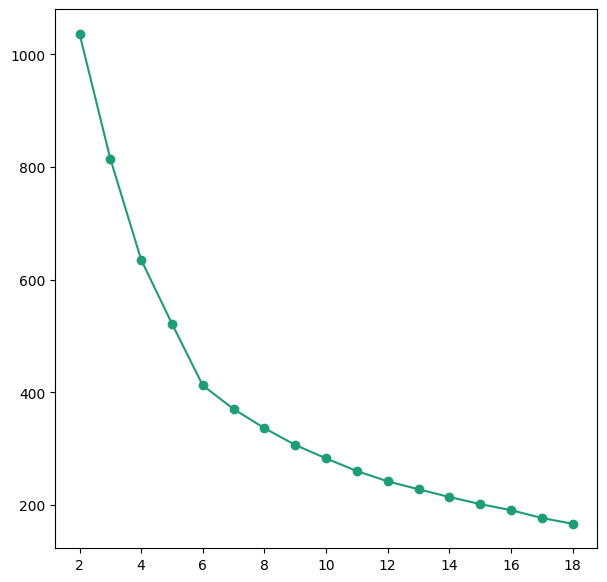

In [30]:
from sklearn.cluster import KMeans

clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

Disini dapat terlihat bahwa elbow terjadi di sekitar 6-7 cluster, yang merupakan perkiraan yang baik.
Meskipun memiliki hasil yang agak meyakinkan diatas, disini akan menggunakan skor Silhoutte untuk melihat apakah dapat memperoleh lebih banyak insight tentang berapa banyak cluster yang akan digunakan. Lihat prosedur dibawah ini :

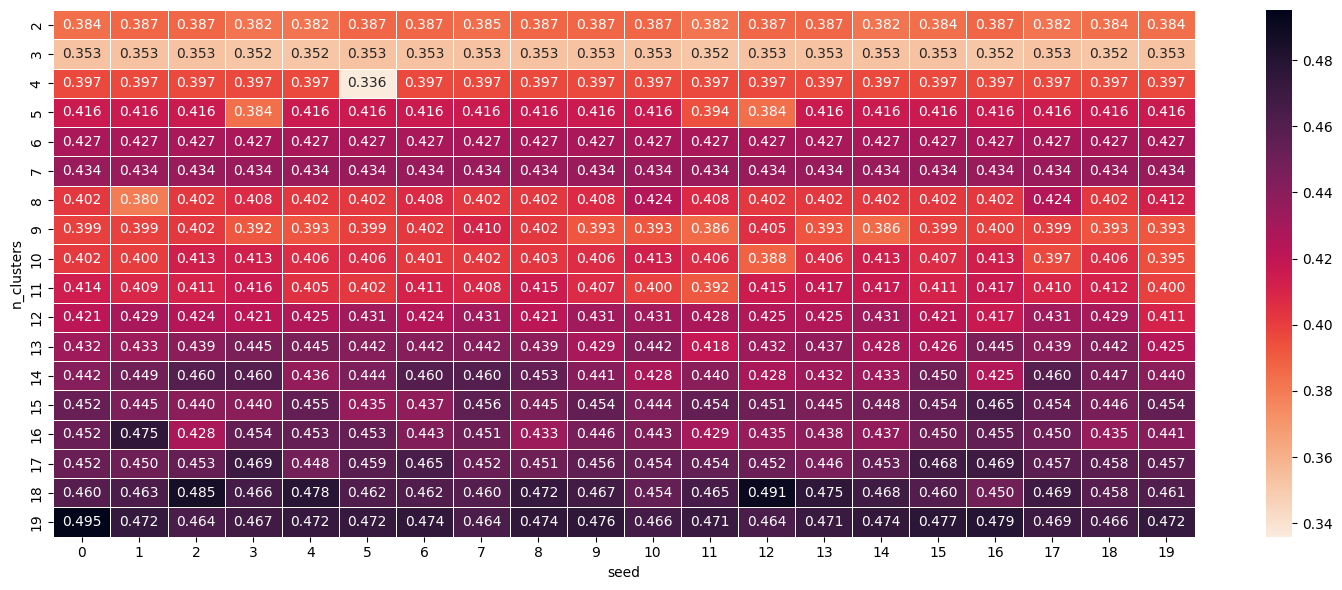

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2, 20)
random_range = range(0, 20)
results = []

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r, n_init=10)  # Memasukkan nilai n_init secara eksplisit
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        results.append([c, r, silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters", "seed", "silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed", values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Dari grafik yang ditunjukkan di atas, kita melihat bahwa ada spike Silhouette score untuk cluster 6 - 7 yang koheren dengan hasil yang kita dapatkan dari metode elbow. Hasil ini menunjukkan bahwa memilih 6 atau 7 cluster menghasilkan kelompok yang terpisah.

Kita putuskan untuk membuat 6 atau 7 cluster dan menggunakan business understanding kita untuk menentukan klasifikasi mana yang memberikan lebih banyak knowledge tentang customer. Pilihan lain adalah memilih 14 atau lebih, yang tidak realistis mengingat data tidak terlalu besar

## Re-running the models

Dibawah ini membuat model untuk 6 dan 7 cluster menggunakan K-Means dan mencoba memahami hasilnya. Disini akan menggunakan PCA untuk memvisualisasikan data dan menentukan apakah 6-7 cluster yang dipilih memberikan kohesi antar cluster dan pemisahan cluster yang baik. Jika tidak, maka akan dijalankan kembali pendekatan ini dengan model Density-Based dan melihat apakah akan mendapatkan hasil yang lebih baik atau tidak.

PCA (Principal Component Analysis) adalah algoritma yang dapat mengurangi dimensi (dimensionality reduction). kita dapat memanfaatkan PCA untuk visualisasi data yang memiliki dimensi yang tinggi

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data = X_pca, columns=['X1', 'X2', 'X3'])
X_pca_df

,X1,X2,X3
0,0.829143,0.350518,-0.162403
1,-0.531854,0.719504,-0.230299
2,0.489493,-0.693627,0.175269
3,0.712487,-0.027906,-0.049583
4,0.718334,-0.036815,-0.052850
...,...,...,...
1995,-0.188657,-0.674905,-0.559832
1996,-0.794289,-0.009952,-0.008375
1997,0.492095,-0.748275,0.192757
1998,-0.881738,-0.282777,0.097842


## Menerapkan K-Means dengan 6 cluster

In [33]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10).fit(X)

Label ditambahkan ke DataFrame untuk memberikan kategori pada visualisasi

In [34]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels
X_pca_df

,X1,X2,X3,Labels
0,0.829143,0.350518,-0.162403,3
1,-0.531854,0.719504,-0.230299,2
2,0.489493,-0.693627,0.175269,0
3,0.712487,-0.027906,-0.049583,3
4,0.718334,-0.036815,-0.052850,3
...,...,...,...,...
1995,-0.188657,-0.674905,-0.559832,5
1996,-0.794289,-0.009952,-0.008375,1
1997,0.492095,-0.748275,0.192757,0
1998,-0.881738,-0.282777,0.097842,1


In [35]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

## Visualization

Data dikelompokan menjadi 6 grup berbeda dan melakukan PCA untuk mendapatkan 3 fitur dari yang awalnya 7 fitur yang dimiliki. Selalu penting untuk diingat bahwa menggunakan PCA secara inherent berarti hilangnya informasi, sehingga proyeksi data dalam fitur baru X1, X2, X3 dapat memiliki beberapa titik yang saling tumpang tindih, namun pada kenyataannya pada saat menggunakan K-Means clustering titik perbatasan didefinisikan dengan jelas

In [39]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3', color = X_pca_df['Labels'])
fig.show()

Dapat dilihat bahwa cluster cukup terpisah dan algoritma K-Means dapat melakukan pemisahan cluster dengan baik, karena batas antar cluster tampak cukup jelas.


In [41]:
customer

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,transfrom_income,transform_age
0,100000001,0,0,67,2,124670,1,2,0.239545,4.204693
1,100000002,1,1,22,1,150773,1,2,0.869781,3.091042
2,100000003,0,0,49,1,89210,0,0,-0.846121,3.891820
3,100000004,0,0,45,1,171565,1,1,1.303766,3.806662
4,100000005,0,0,53,1,149031,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0.209208,3.850148
1996,100001997,1,1,27,1,117744,1,0,0.051991,3.295837
1997,100001998,0,0,31,0,86400,0,0,-0.948374,3.433987
1998,100001999,1,1,24,1,97968,0,0,-0.545364,3.178054


In [44]:
result_df = customer.drop(['ID','transfrom_income','transform_age'], axis=1)
result_df['Labels'] = kmeans.labels_
result_df = result_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


## Summary statistic pada setiap cluster

In [45]:
summary = {}

for index in range(6):
  summary[index] = result_df[result_df['Labels'] == index].describe().T

### Cluster 0

In [46]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Marital status,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age,312.0,37.567308,10.633108,21.0,29.75,36.0,42.00,74.0
Education,312.0,0.737179,0.579524,0.0,0.00,1.0,1.00,2.0
Income,312.0,102566.410256,26584.893960,43684.0,81804.00,103618.5,120396.75,219319.0
Occupation,312.0,0.365385,0.501913,0.0,0.00,0.0,1.00,2.0
Settlement size,312.0,0.060897,0.239526,0.0,0.00,0.0,0.00,1.0
Labels,312.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

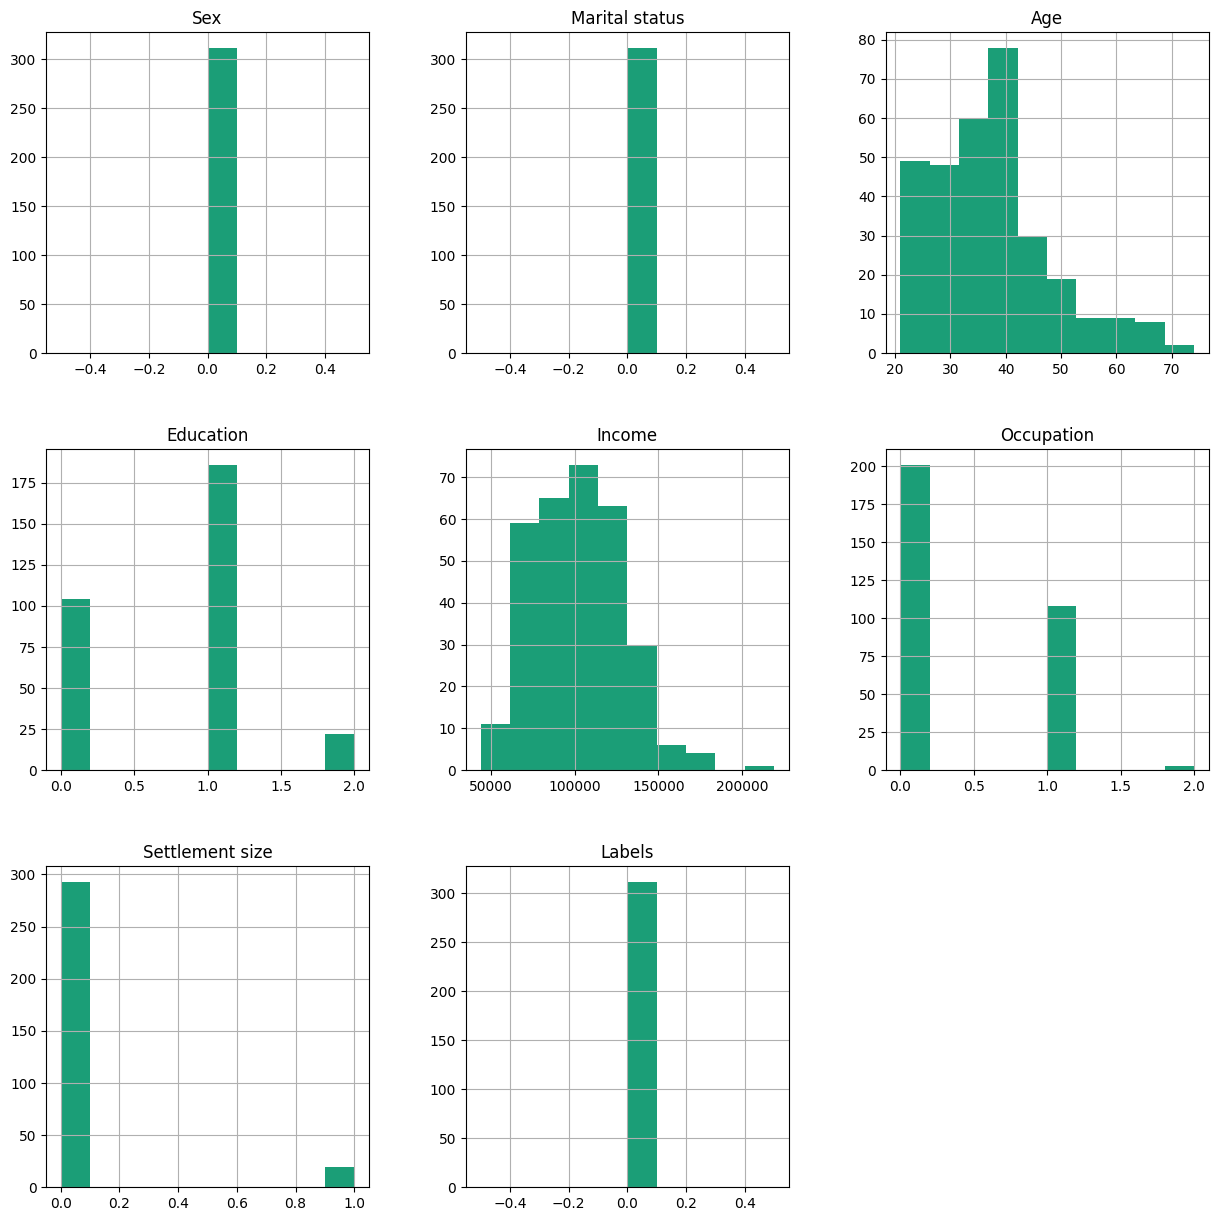

In [49]:
result_df[result_df['Labels'] == 0].hist(figsize=(15,15))

### Cluster 1

In [50]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital status,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,430.0,32.416279,10.911221,18.0,25.00,28.5,36.00,71.0
Education,430.0,1.211628,0.467453,1.0,1.00,1.0,1.00,3.0
Income,430.0,102142.332558,25801.373992,35832.0,86281.25,102323.5,120459.25,207262.0
Occupation,430.0,0.427907,0.495352,0.0,0.00,0.0,1.00,1.0
Settlement size,430.0,0.011628,0.107329,0.0,0.00,0.0,0.00,1.0
Labels,430.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

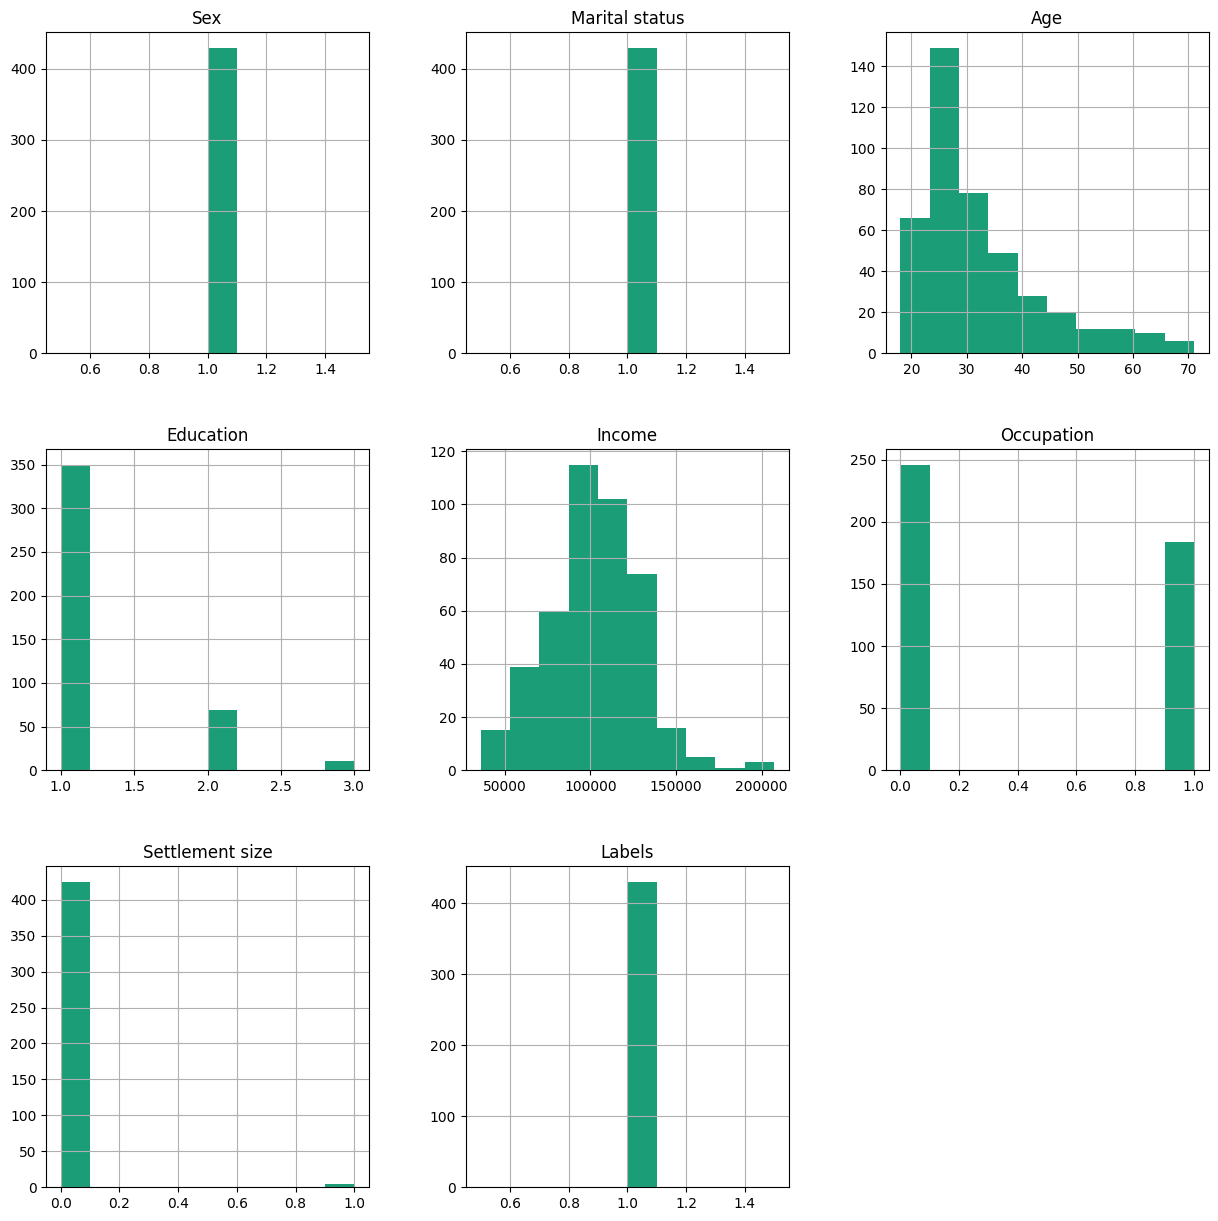

In [51]:
result_df[result_df['Labels'] == 1].hist(figsize=(15,15))

### Cluster 2

In [52]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,306.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,306.0,34.284314,13.001925,18.0,25.0,29.0,40.0,76.0
Education,306.0,1.333333,0.572598,1.0,1.0,1.0,2.0,3.0
Income,306.0,136536.702614,38103.456491,88800.0,108455.0,126778.5,155107.0,309364.0
Occupation,306.0,1.183007,0.403881,0.0,1.0,1.0,1.0,2.0
Settlement size,306.0,1.352941,0.511771,0.0,1.0,1.0,2.0,2.0
Labels,306.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

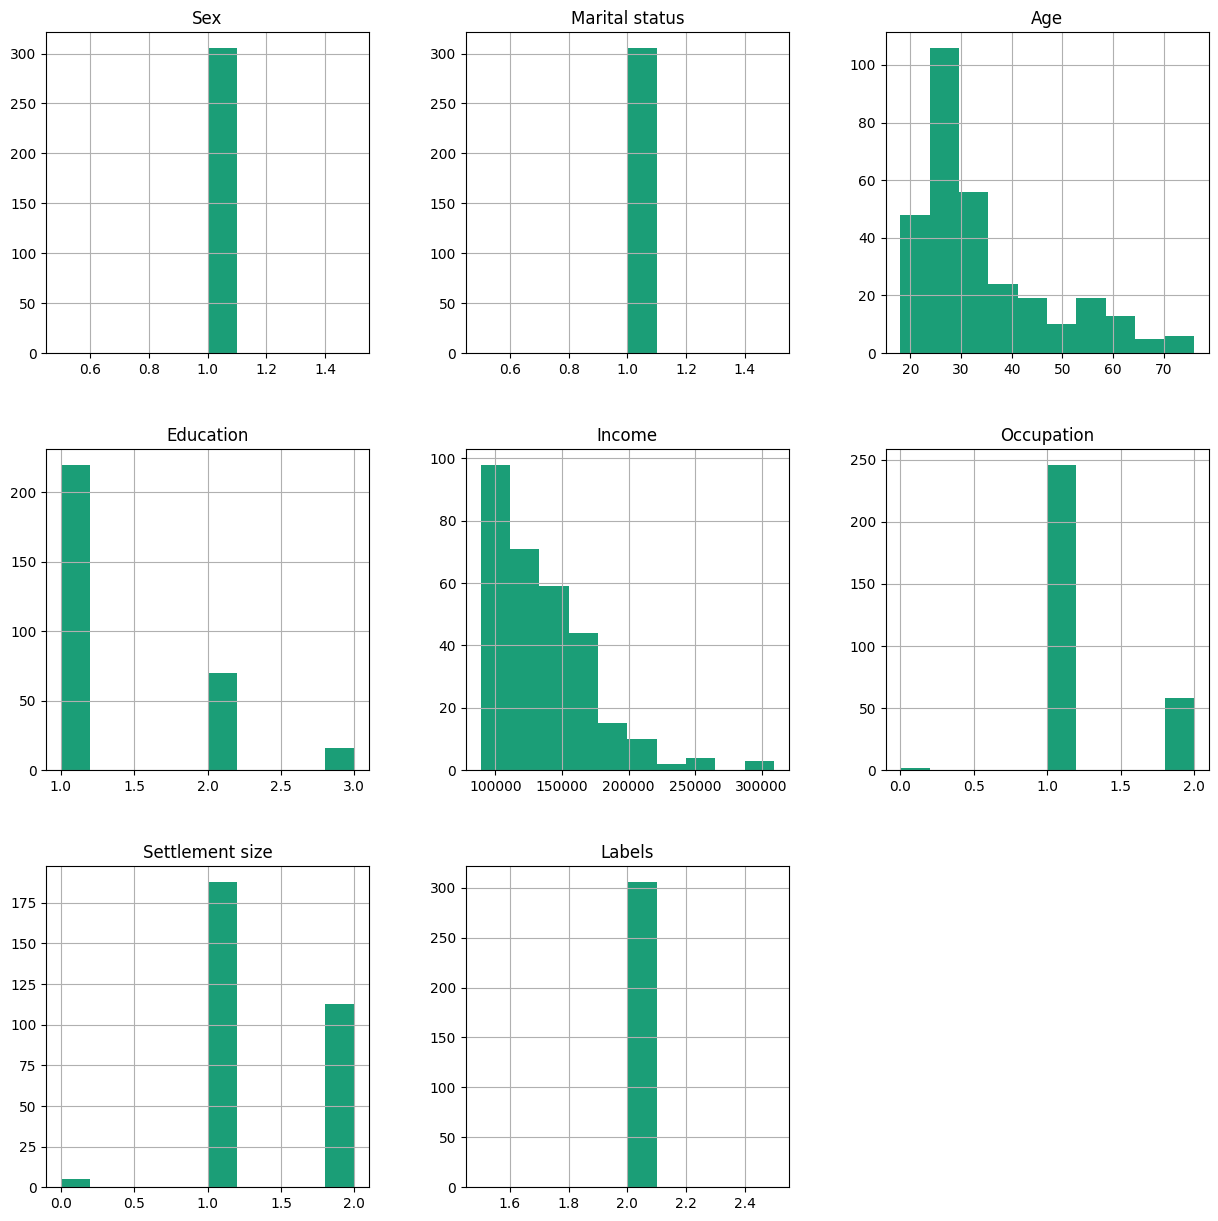

In [53]:
result_df[result_df['Labels'] == 2].hist(figsize=(15,15))

### Cluster 3

In [54]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Sex,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,517.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,517.0,40.001934,11.945532,20.0,31.0,37.0,47.0,75.0
Education,517.0,0.822050,0.612576,0.0,0.0,1.0,1.0,2.0
Income,517.0,145373.611219,38286.684815,82398.0,119276.0,136323.0,159757.0,287247.0
Occupation,517.0,1.266925,0.484577,0.0,1.0,1.0,2.0,2.0
Settlement size,517.0,1.529981,0.507283,0.0,1.0,2.0,2.0,2.0
Labels,517.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

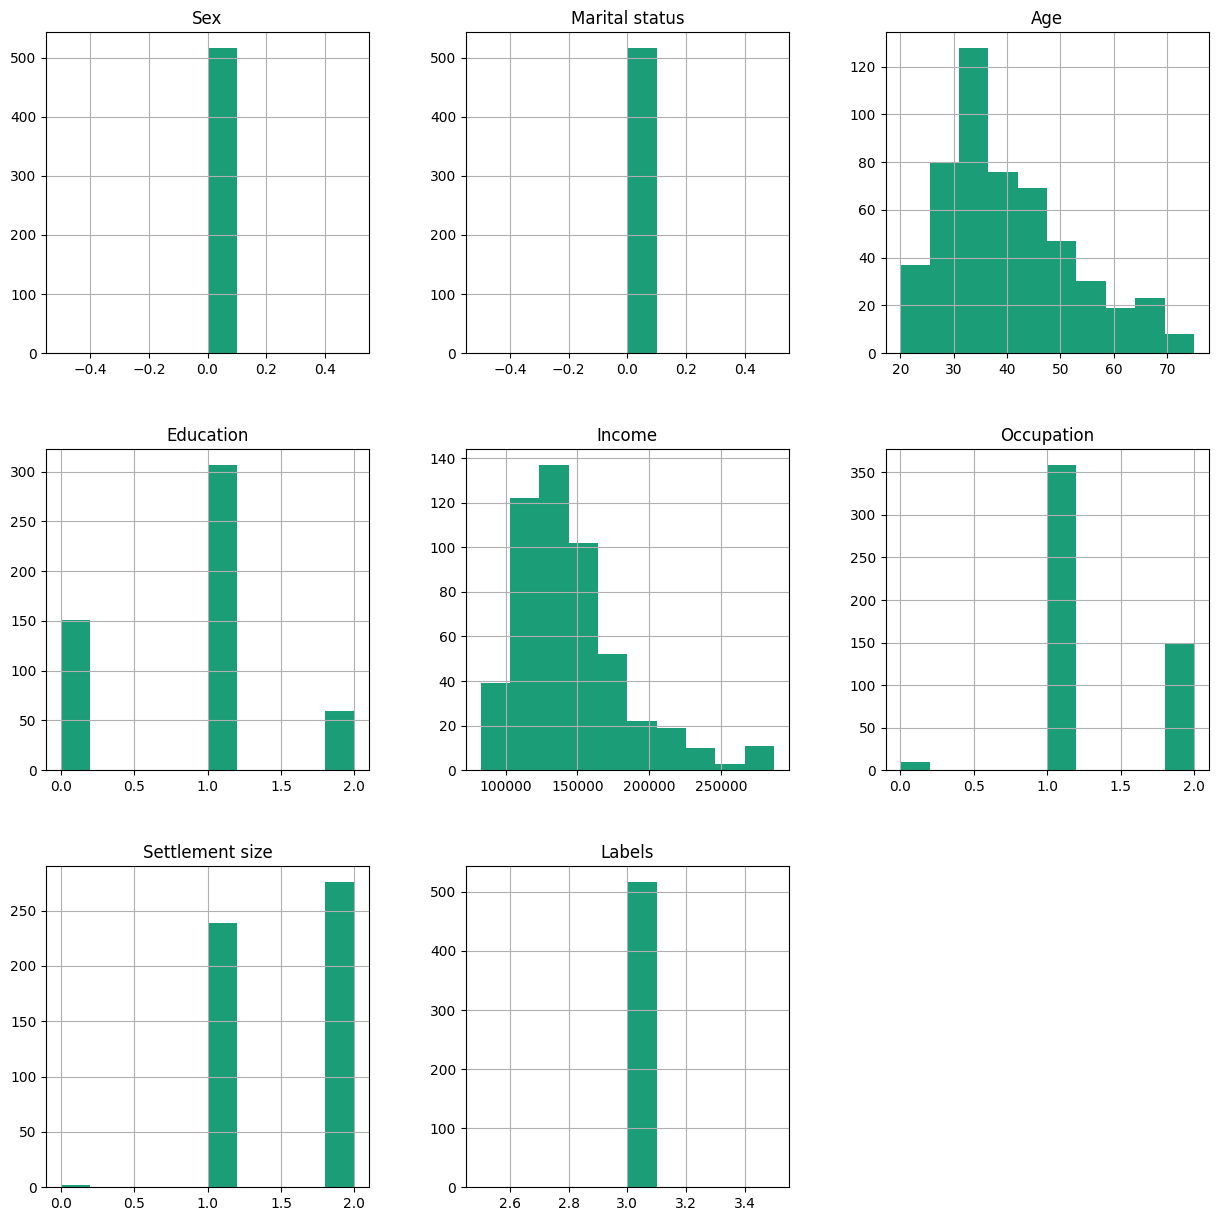

In [55]:
result_df[result_df['Labels'] == 3].hist(figsize=(15,15))

### Cluster 4

In [56]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Sex,257.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital status,257.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,257.0,33.968872,10.759035,18.0,26.0,31.0,40.0,67.0
Education,257.0,1.268482,0.501851,1.0,1.0,1.0,1.0,3.0
Income,257.0,122976.723735,38529.241076,62263.0,96769.0,115369.0,146519.0,280570.0
Occupation,257.0,0.933852,0.630834,0.0,1.0,1.0,1.0,2.0
Settlement size,257.0,0.918288,0.827468,0.0,0.0,1.0,2.0,2.0
Labels,257.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

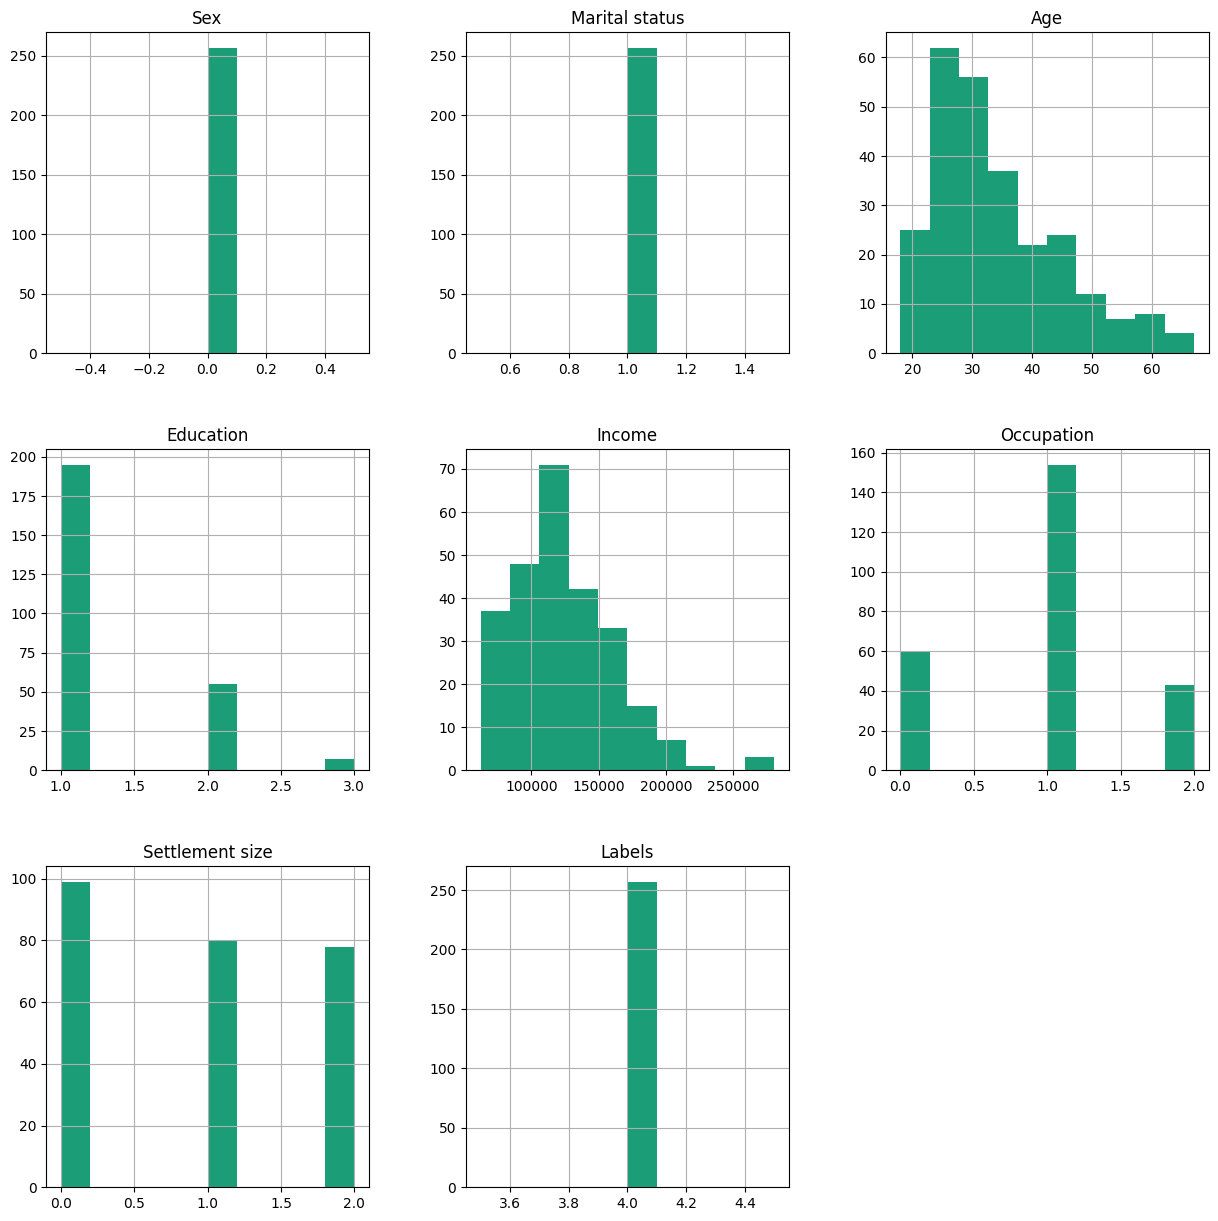

In [57]:
result_df[result_df['Labels'] == 4].hist(figsize=(15,15))

### Cluster 5

In [58]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Sex,178.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Marital status,178.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,178.0,35.146067,9.755833,19.0,27.0,34.5,41.0,70.0
Education,178.0,0.932584,0.558403,0.0,1.0,1.0,1.0,3.0
Income,178.0,97997.241573,21702.050536,36760.0,80892.5,101511.0,113265.0,143321.0
Occupation,178.0,0.370787,0.507169,0.0,0.0,0.0,1.0,2.0
Settlement size,178.0,0.073034,0.260926,0.0,0.0,0.0,0.0,1.0
Labels,178.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Settlement size'}>,
        <Axes: title={'center': 'Labels'}>, <Axes: >]], dtype=object)

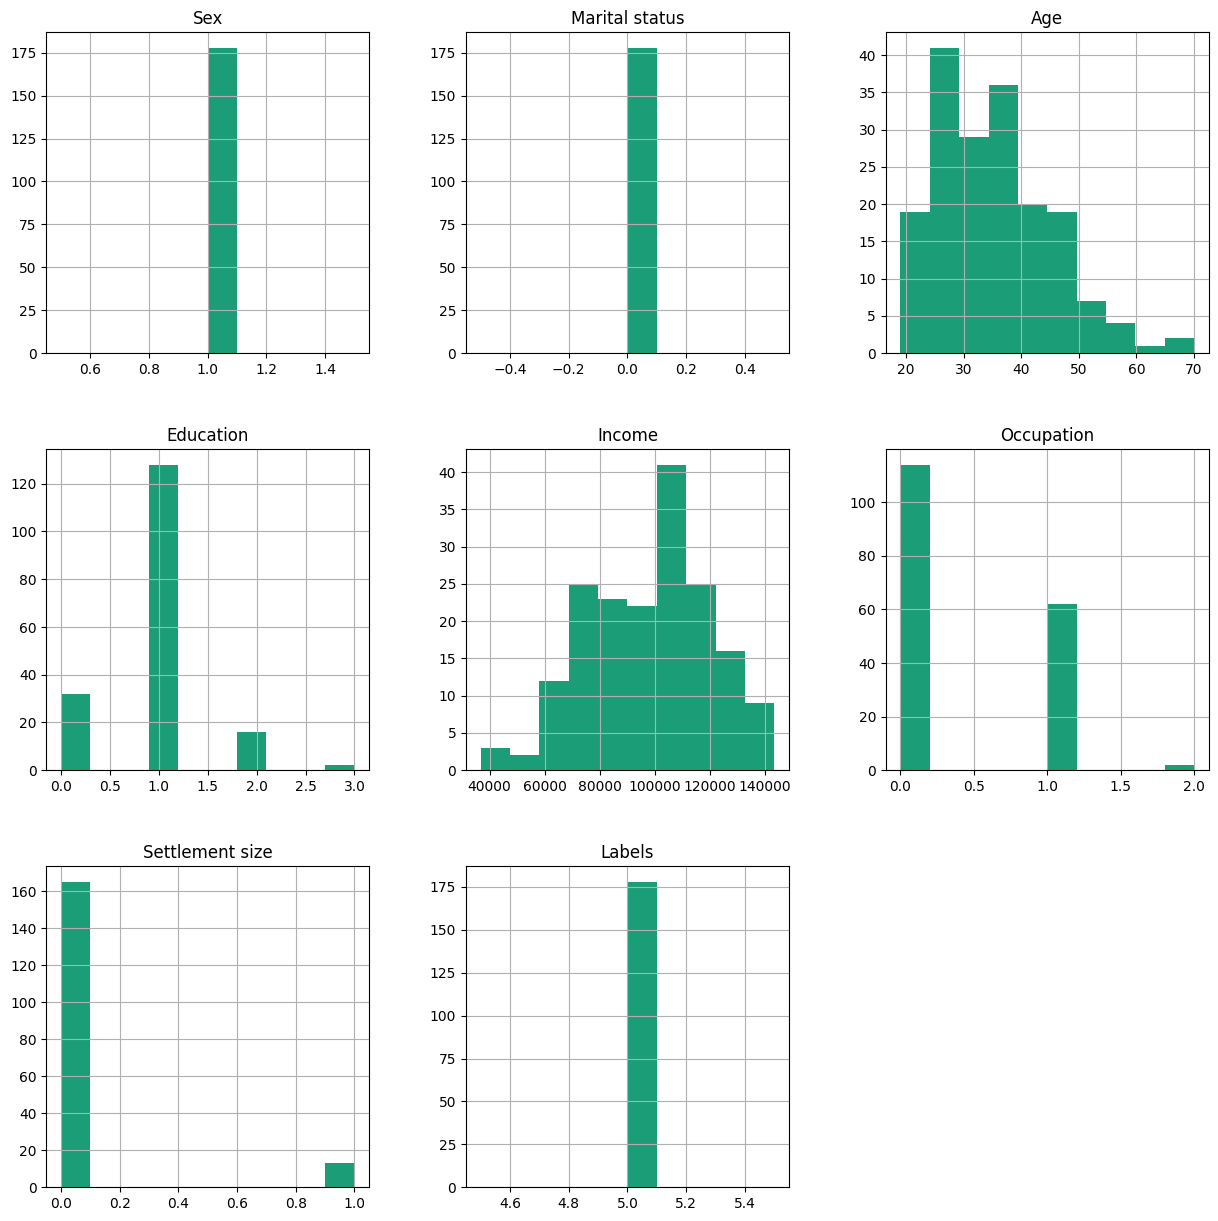

In [59]:
result_df[result_df['Labels'] == 5].hist(figsize=(15,15))

## Cara alternatif untuk mengipretasikan cluster

Menggunakan centroid cluster sebagai sarana untuk memahami cluster itu sendiri

Untuk mendapatkan gambaran cepat tentang statistik cluster per cluster dapat menggunakan centroid dari setiap cluster. Permasalahan dengan metode ini adalah memberikan rasa tendensi sentral, tetapi tidak menceritakan keseluruhan cerita. Outlier memungkinkan mempengaruhi nilai setiap centroid, jadi perlu penanganan dengan hati - hati

Namun ini dapat menjadi ukuran akurasi yang baik dari cluster yang telah dibuat

In [60]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns=result_df.columns[:7], index=['C0','C1', 'C2', 'C3', 'C4', 'C5'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
C0,3.885781e-16,1.332268e-15,0.245726,0.182692,0.030449,0.451144,0.484804
C1,1.000000e+00,1.000000e+00,0.403876,0.213953,0.005814,0.448891,0.375836
C2,1.000000e+00,1.000000e+00,0.444444,0.591503,0.676471,0.585119,0.405291
C3,2.553513e-15,1.776357e-15,0.274017,0.633462,0.764990,0.615822,0.524984
C4,-3.885781e-16,1.000000e+00,0.422827,0.466926,0.459144,0.530253,0.409658
C5,1.000000e+00,1.498801e-15,0.310861,0.185393,0.036517,0.433188,0.439125


Informasi di centroid bisa digunakan untuk memahami data, tetapi seperti metrik tendensi sentral, harusnya deskripsi dari data jangan langsung dipercaya, karena centroid tidak harus menampilkan keseluruhan gambar data dalam setiap cluster. Dapat dilihat bahwa sex dan marital status sebagian besar cluster akan benar, tetapi fitur numerical dan beberapa fitur categorical lebih sulit untuk di tafsirkan. Inilah alasan untuk memilih metode DecisionTree.

# Decision Tree Method

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [62]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [64]:
X_clusters = result_df.drop('Labels', axis=1)
y_clusters = result_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

## Evaluasi Model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       312
           1       1.00      1.00      1.00       430
           2       1.00      0.99      1.00       306
           3       1.00      0.98      0.99       517
           4       1.00      1.00      1.00       257
           5       1.00      1.00      1.00       178

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



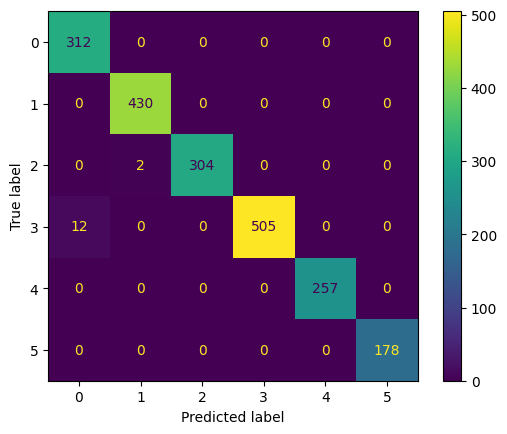

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))
cm = confusion_matrix(y_clusters, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Model ini tampaknya sangat akurat dalam memprediksi nilai kelas, sehingga  dapat diharapkan titik pisahnya juga cukup akurat. Dan akan melanjutkan dengan interpretasi model menggunakan teknik visualisasi dari clustering tree.

## Visualizing clustering tree

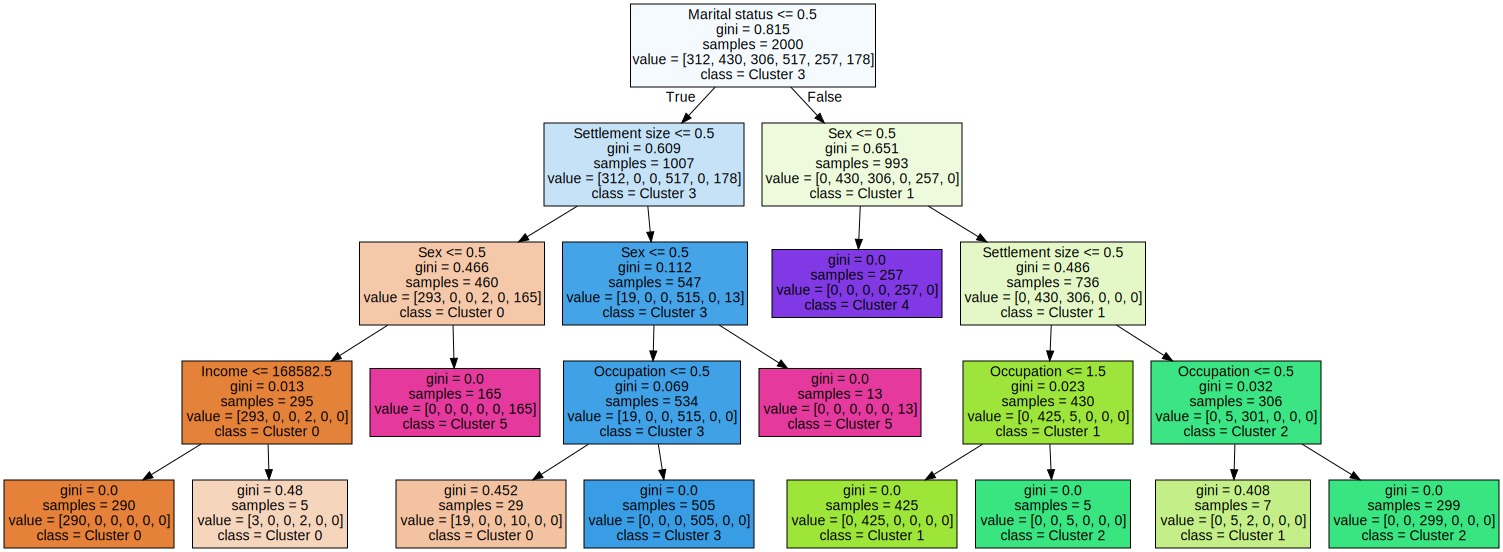

In [68]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
feature_names=result_df.columns[:7],
class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
# plt.savefig('DecisionTree.png')

# Kesimpulan